In [1]:
import urllib.request
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import pywt

In [2]:
def show(img):
    plt.figure(figsize = (10,10))
    plt.imshow(img, cmap="gray")

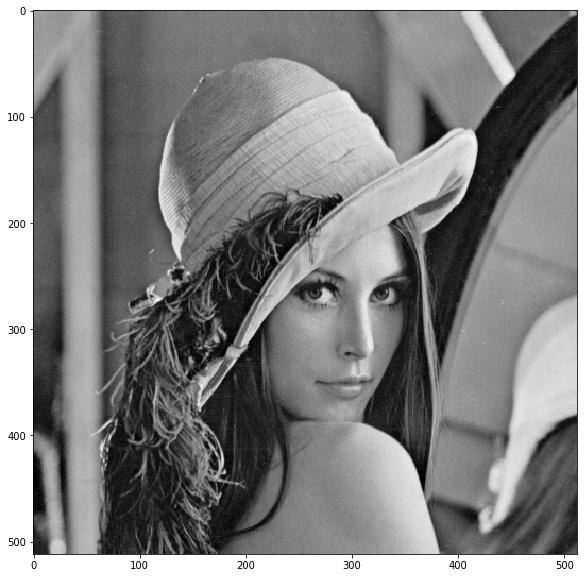

In [66]:
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BGR = cv2.imdecode(arr,-1)
Y = cv2.cvtColor(BGR, cv2.COLOR_BGR2YCrCb)[:,:,0]
Y = Y.astype(np.float32)
show(Y)

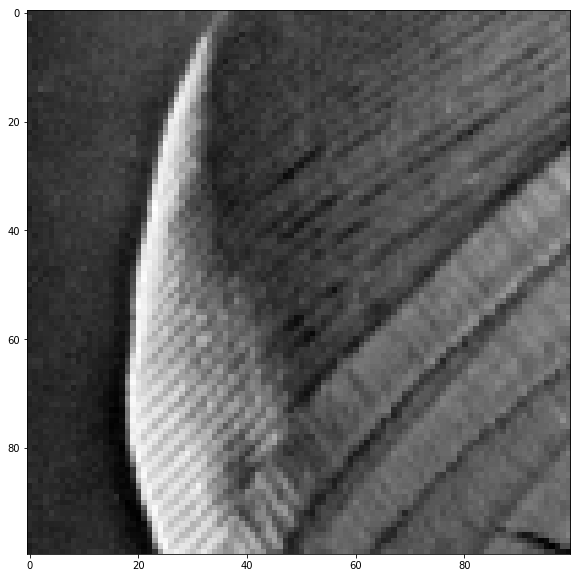

In [67]:
show(Y[100:200, 100:200])

In [68]:
print(Y[100:200, 100:200])

[[102. 102. 103. ... 130. 132. 140.]
 [112. 101. 102. ... 132. 144. 136.]
 [ 97.  99. 104. ... 147. 143. 137.]
 ...
 [ 99. 103.  99. ... 128. 139. 140.]
 [ 92.  97. 101. ...  88. 120. 121.]
 [ 95. 100.  96. ...  87.  85.  80.]]


In [69]:
Y.max()

245.0

In [70]:
Y.min()

25.0

In [71]:
kernel = np.array([[-1,-4,-1], [-4,20,-4], [-1,-4,-1]])

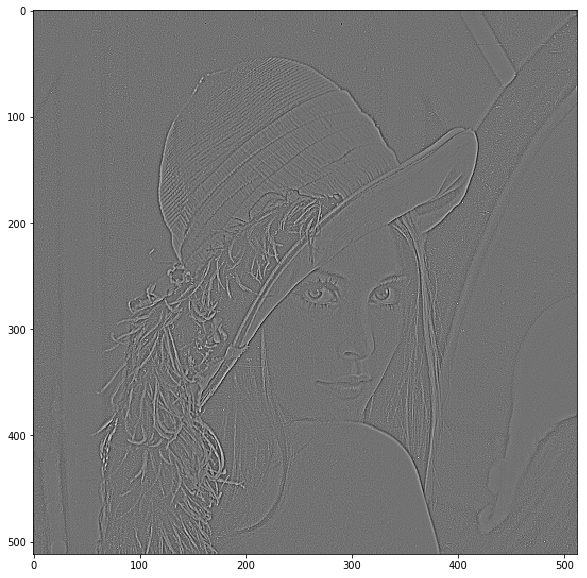

In [72]:
# Esto no es relevante, es sólo por curiosidad
filtered = cv2.filter2D(Y, -1, kernel)
show(filtered)

In [73]:
print(filtered[100:200, 100:200])

[[ -60.   -2.    1. ... -145.  -92.   60.]
 [ 198.  -46.    1. ... -125.  154.  -71.]
 [-113.  -41.   47. ...  102.   56.   28.]
 ...
 [  41.  106.  -31. ...  160.  158.   58.]
 [-114.  -33.   39. ... -328.  233.   61.]
 [  -4.   92.  -61. ... -224. -211. -363.]]


In [74]:
filtered.max()

1264.0

In [75]:
filtered.min()

-1021.0

In [76]:
np.sum(filtered)

606.0

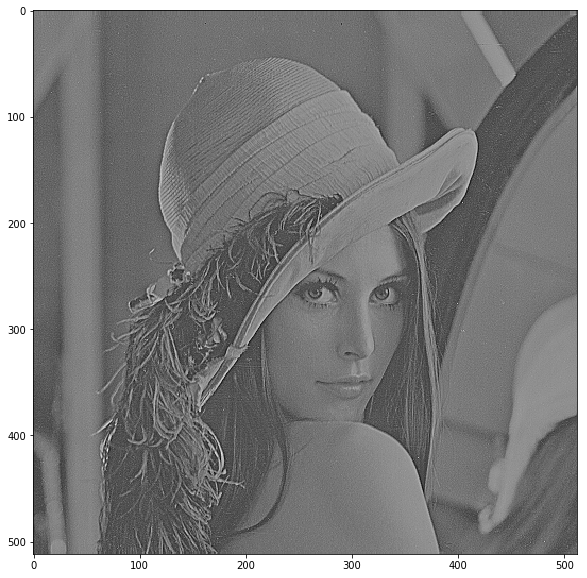

In [77]:
sharpened = Y + filtered/4
plt.figure(figsize = (10,10))
plt.imshow(sharpened, cmap="gray")

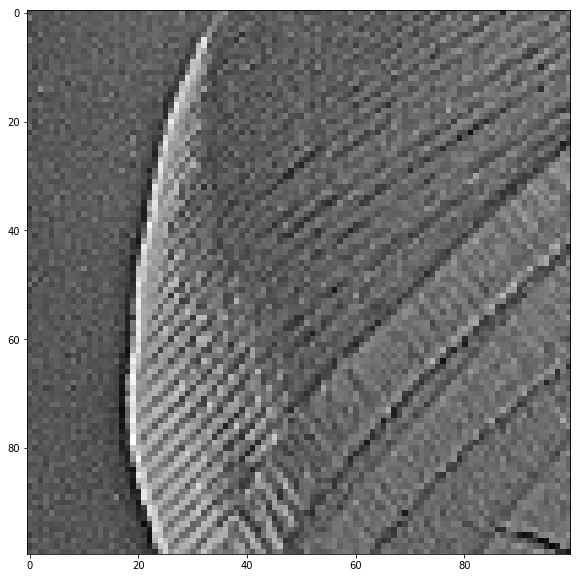

In [78]:
show(sharpened[100:200, 100:200])

In [79]:
print(sharpened[100:200, 100:200])

[[ 87.   101.5  103.25 ...  93.75 109.   155.  ]
 [161.5   89.5  102.25 ... 100.75 182.5  118.25]
 [ 68.75  88.75 115.75 ... 172.5  157.   144.  ]
 ...
 [109.25 129.5   91.25 ... 168.   178.5  154.5 ]
 [ 63.5   88.75 110.75 ...   6.   178.25 136.25]
 [ 94.   123.    80.75 ...  31.    32.25 -10.75]]


In [80]:
sharpened.max()

513.0

In [81]:
shapened.min()

-177.25

In [ ]:
# Hasta aquí la curiosidad por el realce de imágenes

In [82]:
# Calculamos la DWT de la imagen original
wavelet = 'bior1.1'
L, H = pywt.dwt2(Y, wavelet, 'per')

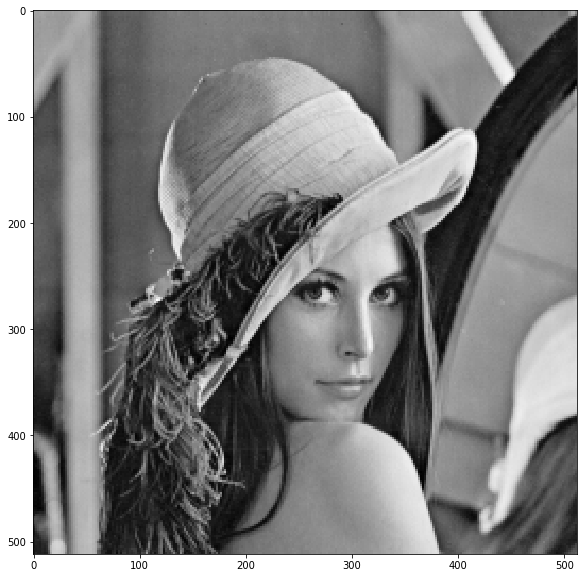

In [87]:
# Calculamos [L] (que es la imagen que vamos a realzar)
zero = np.zeros((L.shape[0],L.shape[1]))
_L_ = pywt.idwt2((L, (zero, zero, zero)), wavelet, 'per')
plt.figure(figsize = (10,10))
plt.imshow(_L_, cmap="gray")

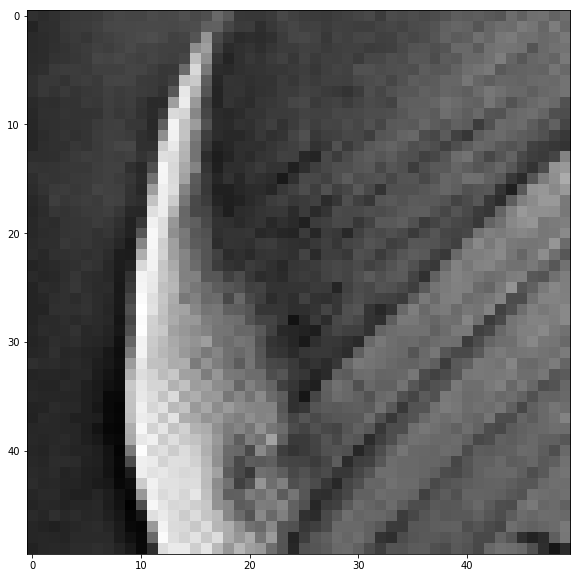

In [89]:
show(L[50:100, 50:100])

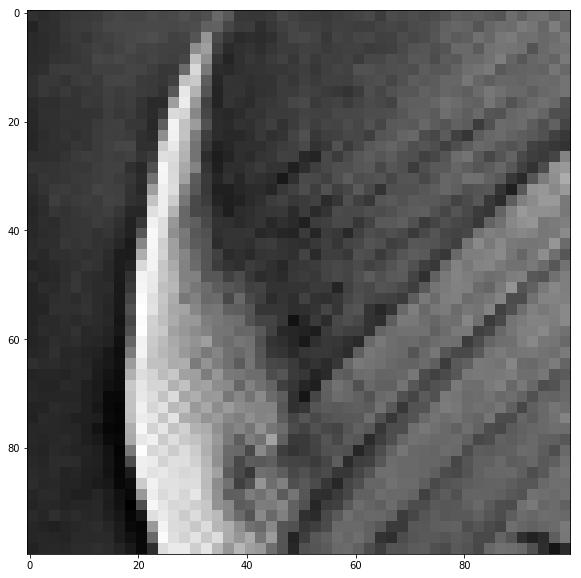

In [90]:
show(_L_[100:200, 100:200])

In [93]:
print(Y[100:200, 100:200])
print(_L_[100:200, 100:200])

[[102. 102. 103. ... 130. 132. 140.]
 [112. 101. 102. ... 132. 144. 136.]
 [ 97.  99. 104. ... 147. 143. 137.]
 ...
 [ 99. 103.  99. ... 128. 139. 140.]
 [ 92.  97. 101. ...  88. 120. 121.]
 [ 95. 100.  96. ...  87.  85.  80.]]
[[104.25 104.25 101.75 ... 132.5  138.   138.  ]
 [104.25 104.25 101.75 ... 132.5  138.   138.  ]
 [ 98.    98.   102.75 ... 147.25 136.5  136.5 ]
 ...
 [ 98.25  98.25  99.25 ... 130.   143.5  143.5 ]
 [ 96.    96.    99.25 ...  89.25 101.5  101.5 ]
 [ 96.    96.    99.25 ...  89.25 101.5  101.5 ]]


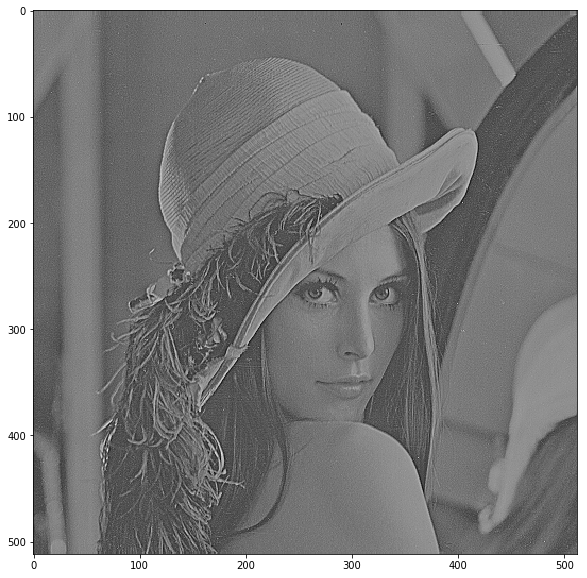

In [94]:
# Realzamos [L]
filtered = cv2.filter2D(_L_, -1, kernel)
sharpened = _L_ + filtered
plt.figure(figsize = (10,10))
plt.imshow(shapened, cmap="gray")

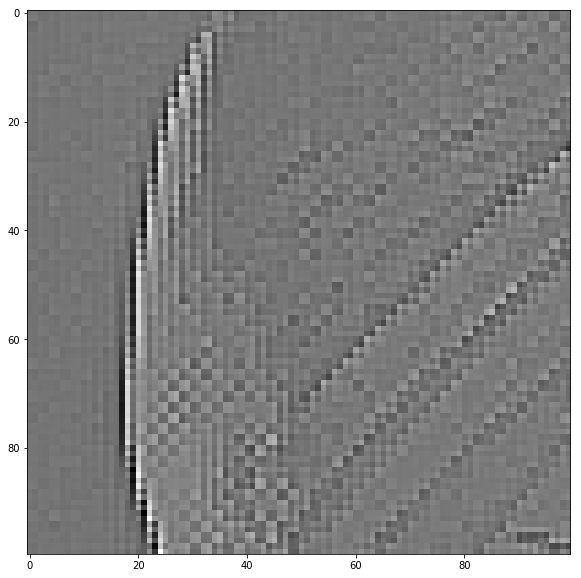

In [95]:
show(sharpened[100:200, 100:200])

In [96]:
sharp_L, sharp_H = pywt.dwt2(sharpened, wavelet, 'per')

In [103]:
sharp_H_ = pywt.idwt2((zero, sharp_H), wavelet, 'per')

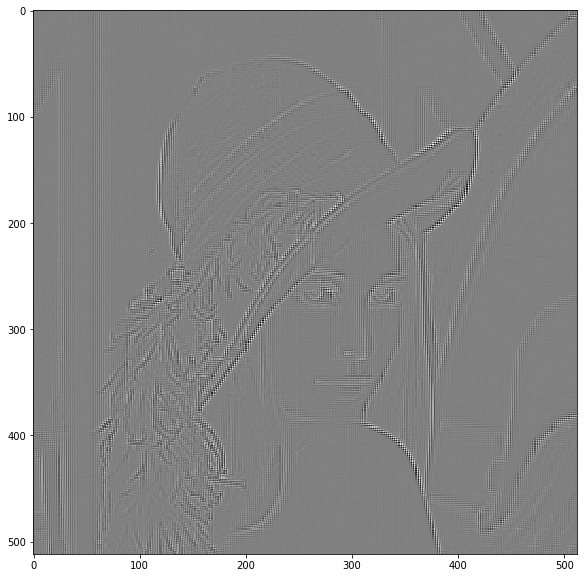

In [104]:
show(sharp_H_)

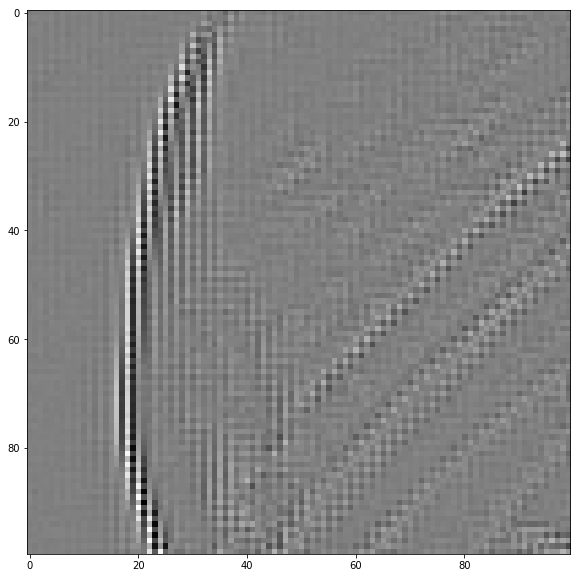

In [105]:
show(sharp_H_[100:200, 100:200])

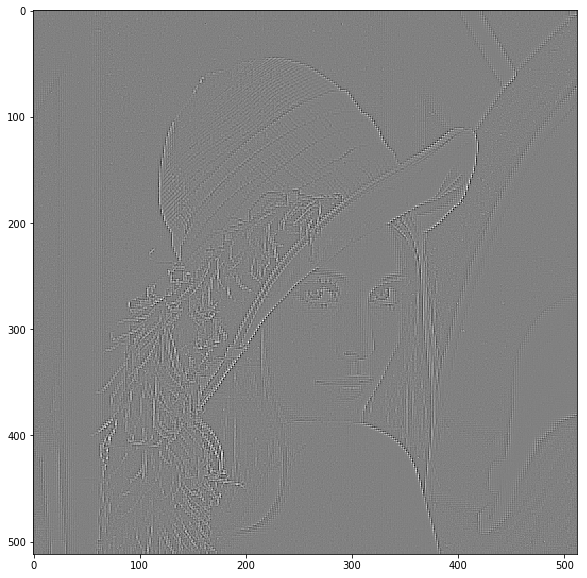

In [106]:
# Ahora vamos a ver qué es lo queríamos generar ...
_H_ = pywt.idwt2((zero, H), wavelet, 'per')
show(_H_)

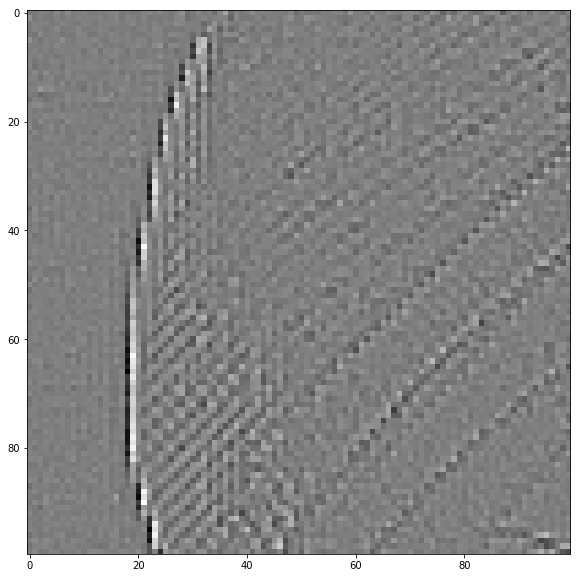

In [107]:
show(_H_[100:200, 100:200])